In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import pywt
import os

In [2]:
img_path = 'C:/Users/91994/Desktop/ML/C/model/dataset/virat_kohli/220px-thumbnail.jpg'

In [3]:
img = cv2.imread(img_path)
if(img is not None):
    cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

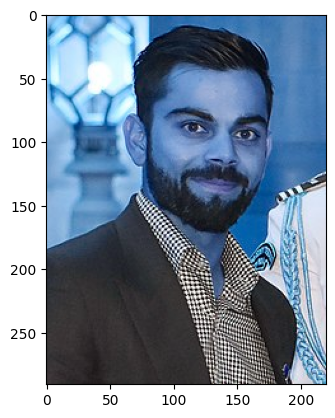

In [4]:
plt.imshow(img)

In [5]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(291, 220)

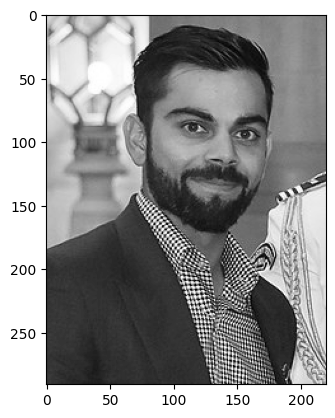

In [6]:
plt.imshow(gray, cmap='gray')

In [7]:
face_cascade = cv2.CascadeClassifier('C:/Users/91994/Desktop/ML/C/opencv/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('C:/Users/91994/Desktop/ML/C/opencv/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[ 70,  39, 127, 127]])

In [8]:
(x,y,w,h) = faces[0]
x,y,w,h

(70, 39, 127, 127)

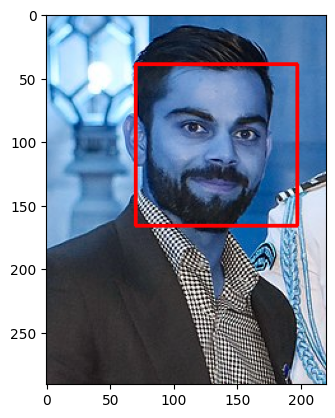

In [9]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

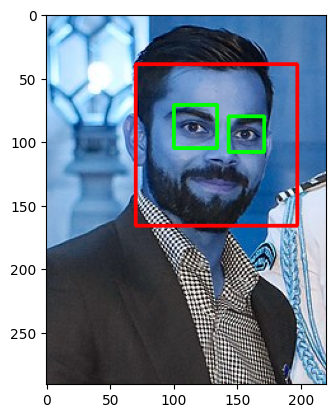

In [10]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

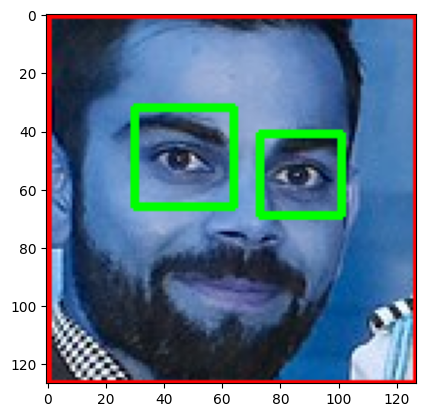

In [11]:
plt.imshow(roi_color, cmap='gray')

In [12]:
cropped_img = np.array(roi_color)
cropped_img.shape

(127, 127, 3)

In [13]:
def w2d(img, mode='haar', level=1):
    imArray = img
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    imArray =  np.float32(imArray)   
    imArray /= 255;
    coeffs=pywt.wavedec2(imArray, mode, level=level)
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)
    return imArray_H

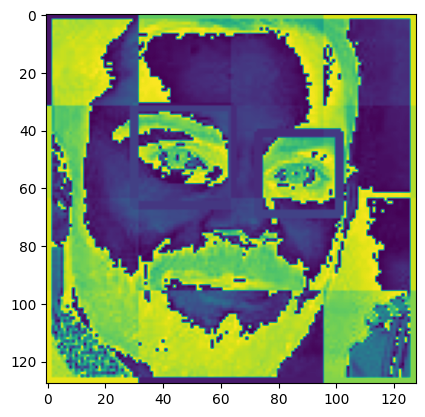

In [65]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [15]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

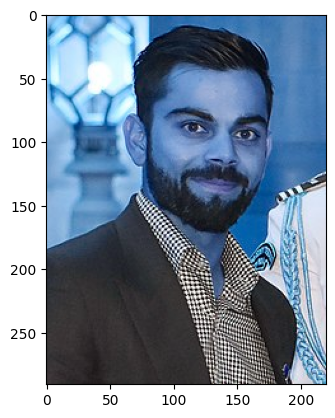

In [16]:
original_image = cv2.imread(img_path)
plt.imshow(original_image)

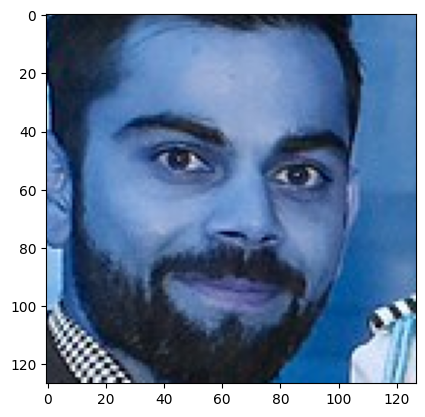

In [17]:
cropped_image = get_cropped_image_if_2_eyes(img_path)
plt.imshow(cropped_image)

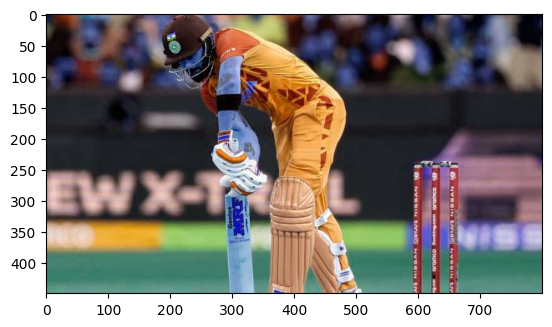

In [18]:
path1 = 'C:/Users/91994/Desktop/ML/C/model/dataset/virat_kohli/348900.4.jpg'
org_image_obstructed = cv2.imread(path1)
plt.imshow(org_image_obstructed)

In [68]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes(path1)
cropped_image_no_2_eyes

In [20]:
path_to_data = "C:/Users/91994/Desktop/ML/C/model/dataset"
path_to_cr_data = "C:/Users/91994/Desktop/ML/C/model/dataset/cropped"

In [21]:
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [22]:
img_dirs

['C:/Users/91994/Desktop/ML/C/model/dataset\\cristiano_ronaldo',
 'C:/Users/91994/Desktop/ML/C/model/dataset\\lionel_messi',
 'C:/Users/91994/Desktop/ML/C/model/dataset\\maria_sharapova',
 'C:/Users/91994/Desktop/ML/C/model/dataset\\roger_federer',
 'C:/Users/91994/Desktop/ML/C/model/dataset\\serena_williams',
 'C:/Users/91994/Desktop/ML/C/model/dataset\\virat_kohli']

In [23]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [24]:
print(entry.path)

C:/Users/91994/Desktop/ML/C/model/dataset\virat_kohli


In [25]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  C:/Users/91994/Desktop/ML/C/model/dataset/croppeddataset\cristiano_ronaldo
Generating cropped images in folder:  C:/Users/91994/Desktop/ML/C/model/dataset/croppeddataset\lionel_messi
Generating cropped images in folder:  C:/Users/91994/Desktop/ML/C/model/dataset/croppeddataset\maria_sharapova
Generating cropped images in folder:  C:/Users/91994/Desktop/ML/C/model/dataset/croppeddataset\roger_federer
Generating cropped images in folder:  C:/Users/91994/Desktop/ML/C/model/dataset/croppeddataset\serena_williams
Generating cropped images in folder:  C:/Users/91994/Desktop/ML/C/model/dataset/croppeddataset\virat_kohli


In [34]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'croppeddataset\\cristiano_ronaldo': ['C:/Users/91994/Desktop/ML/C/model/dataset/croppeddataset\\cristiano_ronaldo\\cristiano_ronaldo1.png',
  'C:/Users/91994/Desktop/ML/C/model/dataset/croppeddataset\\cristiano_ronaldo\\cristiano_ronaldo10.png',
  'C:/Users/91994/Desktop/ML/C/model/dataset/croppeddataset\\cristiano_ronaldo\\cristiano_ronaldo11.png',
  'C:/Users/91994/Desktop/ML/C/model/dataset/croppeddataset\\cristiano_ronaldo\\cristiano_ronaldo12.png',
  'C:/Users/91994/Desktop/ML/C/model/dataset/croppeddataset\\cristiano_ronaldo\\cristiano_ronaldo13.png',
  'C:/Users/91994/Desktop/ML/C/model/dataset/croppeddataset\\cristiano_ronaldo\\cristiano_ronaldo14.png',
  'C:/Users/91994/Desktop/ML/C/model/dataset/croppeddataset\\cristiano_ronaldo\\cristiano_ronaldo15.png',
  'C:/Users/91994/Desktop/ML/C/model/dataset/croppeddataset\\cristiano_ronaldo\\cristiano_ronaldo16.png',
  'C:/Users/91994/Desktop/ML/C/model/dataset/croppeddataset\\cristiano_ronaldo\\cristiano_ronaldo17.png',
  'C:/User

In [35]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'croppeddataset\\cristiano_ronaldo': 0,
 'croppeddataset\\lionel_messi': 1,
 'croppeddataset\\maria_sharapova': 2,
 'croppeddataset\\roger_federer': 3,
 'croppeddataset\\serena_williams': 4,
 'croppeddataset\\virat_kohli': 5}

In [37]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])   

In [38]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(244, 4096)

In [39]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.6557377049180327

In [41]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.64      0.82      0.72        11
           1       0.70      0.64      0.67        11
           2       0.91      0.71      0.80        14
           3       0.50      0.50      0.50        10
           4       0.44      0.50      0.47         8
           5       0.71      0.71      0.71         7

    accuracy                           0.66        61
   macro avg       0.65      0.65      0.65        61
weighted avg       0.67      0.66      0.66        61



In [42]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [43]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [44]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.743093,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.442643,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.682733,{'logisticregression__C': 5}


In [45]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=5, solver='liblinear'))])}

In [46]:
best_estimators['svm'].score(X_test,y_test)

0.7540983606557377

In [47]:
best_estimators['random_forest'].score(X_test,y_test)

0.5245901639344263

In [48]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.7540983606557377

In [64]:
best_pipeline = best_estimators['logistic_regression']

image_path = "C:/Users/91994/Desktop/ML/C/model/dataset/cropped/cristiano_ronaldo/cristiano_ronaldo44.png"
new_img = cv2.imread(image_path)

scalled_raw_img = cv2.resize(new_img, (32, 32))
img_har = w2d(new_img, 'db1', 5)
scalled_img_har = cv2.resize(img_har, (32, 32))
combined_img = np.vstack((scalled_raw_img.reshape(32 * 32 * 3, 1), scalled_img_har.reshape(32 * 32, 1)))
processed_img = np.array(combined_img).reshape(1, -1).astype(float)

custom_names = {
    0: "Cristiano Ronaldo",
    1: "Lionel Messi",
    2: "Maria Sharapova",
    3: "Roger Federe",
    4: "Serena Williams",
    5: "Virat Kholi",
}
predicted_class = best_pipeline.predict(processed_img)[0]
predicted_celebrity_custom = custom_names.get(predicted_class, "Unknown")
print("Predicted Celebrity :", predicted_celebrity_custom)

Predicted Celebrity : Cristiano Ronaldo
